<a href="https://colab.research.google.com/github/Sanaenajimi/MLL_Portfolio/blob/main/Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabates Prediction Model**

By : Najimi Sanae

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

## EDA

### Understanding the data set : Diabetes dataset
*The data set used contains 9,538 medical records related to diabetes diagnosis and risk factors. It includes various health parameters, lifestyle habits, and genetic predispositions that contribute to diabetes risk.*

1. Age: The age of the individual
2. Pregnancies: Number of times the patient has been pregnant.
3. BMI (Body Mass Index): A measure of body fat based on height and weight (kg/m²).
4. Glucose: Blood glucose concentration (mg/dL), a key diabetes indicator.
5. BloodPressure: Systolic blood pressure (mmHg), higher levels may indicate hypertension.
6. HbA1c: Hemoglobin A1c level (%), representing average blood sugar over months.
7. LDL (Low-Density Lipoprotein): "Bad" cholesterol level (mg/dL).
8. HDL (High-Density Lipoprotein): "Good" cholesterol level (mg/dL).
9. Triglycerides: Fat levels in the blood (mg/dL), high values increase diabetes risk.
10. WaistCircumference: Waist measurement (cm), an indicator of central obesity.
11. HipCircumference: Hip measurement (cm), used to calculate WHR.
12. WHR (Waist-to-Hip Ratio): Waist circumference divided by hip circumference.
13. FamilyHistory: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).
14. DietType: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).
15. Hypertension: Presence of high blood pressure (1 = Yes, 0 = No).
16. MedicationUse: Indicates if the individual is taking medication (1 = Yes, 0 = No).
17. Outcome: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).

*This dataset is useful for exploring the relationships between lifestyle choices, genetic factors, and diabetes risk, providing valuable insights for predictive modeling and health analytics.*

In [ ]:
df = pd.read_csv('diabetes_dataset.csv')

In [ ]:
df.head(3)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0


In [ ]:
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [ ]:
df.isnull().sum()

,0
Age,0
Pregnancies,0
BMI,0
Glucose,0
BloodPressure,0
HbA1c,0
LDL,0
HDL,0
Triglycerides,0
WaistCircumference,0


*No missing values in our data set*

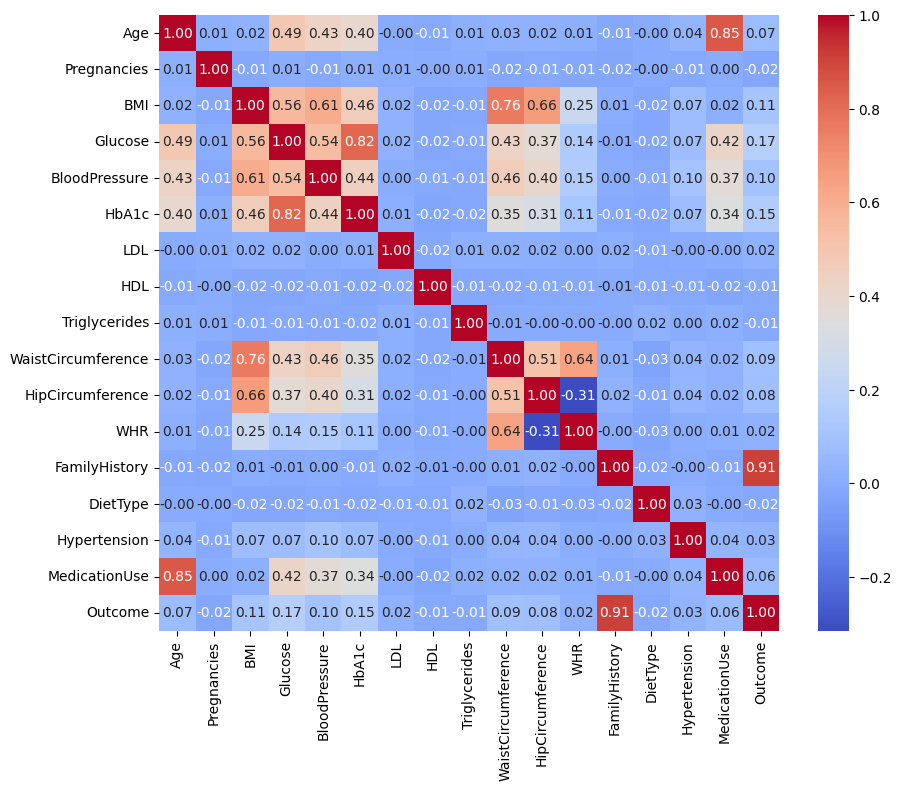

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm',fmt=".2f")
plt.show()

Comment :

> The correlation graph shows strong correlations between : The Age vs Medication use, BMI vs Waist Circumference & Hip Circumference & Blood Pressure , Glucose vs HbA1c, Whr vs BMI & Waist Circumference Therefore let's analyse the VIF (variance inflation factor) to know exactly the features causing high multicolinearity and that must be adressed.




In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(df)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

              Variable          VIF
0                const  2403.544609
1                  Age     4.501163
2          Pregnancies     1.001551
3                  BMI     4.558698
4              Glucose     4.278792
5        BloodPressure     2.183962
6                HbA1c     3.036673
7                  LDL     1.001934
8                  HDL     1.002312
9        Triglycerides     1.002128
10  WaistCircumference    61.089348
11    HipCircumference    39.383544
12                 WHR    49.151055
13       FamilyHistory     6.844479
14            DietType     1.002909
15        Hypertension     1.016222
16       MedicationUse     3.672936
17             Outcome     7.050586


Comments :
> The variance inflation factor is above 10 for three features reflecting high multicolinearity of some of our features. Since the logistic regression is sensitive to multicolinearity we should proceed it.






> Based on the above results  we can consider dropping the Waist and Hip circumference features since they create lot of multicolinearity in our data set and keep the BMI. The three features give informations about general obesity (BMI) and body fat in specific areas (Hip & Waist Circumferences) so we can keep the BMI since it gives general informations about the body fat.

> For Glucose and HbA1c those are two important indicators for our data analysis so we will keep them for now for our analysis and check for overfitting later*



###Defining features and dependent variable

In [ ]:
X = df.drop(['WaistCircumference', 'HipCircumference', 'Outcome'], axis=1)
X = np.array(X)
y = df.iloc[:,-1].values

In [ ]:
print(np.unique(y))

[0 1]


### Recheck for multicollinearity

In [ ]:
X_df = pd.DataFrame(X)
X_const2 = add_constant(X_df)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const2.columns
vif_data['VIF'] = [variance_inflation_factor(X_const2.values, i) for i in range(X_const2.shape[1])]

print(vif_data)

   Variable         VIF
0     const  220.712192
1         0    4.499563
2         1    1.001405
3         2    2.467508
4         3    4.158005
5         4    2.183747
6         5    3.018053
7         6    1.001793
8         7    1.002128
9         8    1.001932
10        9    1.069191
11       10    1.001290
12       11    1.002439
13       12    1.013122
14       13    3.670935


Comment :

> The new VIF results show that there is no severe  multicollinearity between our features , so we can now proceed on building our model.



## Splitting the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , random_state = 42, test_size = 0.2)


## Scaling our features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, :12] = scaler.fit_transform(X_train[:,:12])
X_test[:, :12] = scaler.fit_transform(X_test[:,:12])

Comment :

> The scaling will be only done on the numeric variables , FamilyHistory , DietType, HyperTension , MedicationUse are categorical variables with binary values (0/1) so they need no scaling.



In [ ]:
print(X_train[:1,:])

[[-0.21174941  0.20378079  0.72443505  0.59144857  0.81423776  0.72828366
  -0.25234789  0.39494309  0.5352753  -0.05638704 -0.66304045  0.79262647
   0.          0.        ]]


## Building our classification model : Logistic Regression Model

### Predicting the test set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


Comment :

> The results give  a first good impression of the accuracy of our model , but let's dive deeper into the accuracy test to check if our model is robust or not



## Testing accuracy and making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(cm)
print(accuracy)


[[1270    5]
 [   2  631]]
0.9963312368972747


Comments :


> The results show that our  has an accuracy of 99.6% , with 1270 correctly predicted negative value( No diabetes predictions) , and 2  incorrect ones , and with 5 incorrect positive predicted value( Has diabete) vs 631 correct ones . So far our model is very robust.


> **NB : I have previously performed the model while keeping the features : Waist and Hip circumferences , and the model had an accuracy of 99.04% vs the current one 99.6% with more incorrect predictions than after removing them. I did the same  by removing  the Glucose indicator , but the accuracy droped to 96% vs 99.6% with this fetaure kept, which means that this feature is very important and retain important informations in our analysis, to have a last check if keeping this feature won't occur overfitting in our predictions let's have a further test**



### Checking for overfitting and Cross validation test

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
y_train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(y_train,y_train_pred)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f'Accuracy of test set : {accuracy}, Accuracy of train set : {accuracy_train}')

Cross-Validation Scores: [0.99410223 0.99082569 0.99475754 0.99279161 0.9921363 ]
Mean CV Accuracy: 0.9929
Accuracy of test set : 0.9905660377358491, Accuracy of train set : 0.9950196592398427


#### Comments :

> The mean cross-validation accuracy is around 99% confirming that the model performs consistently across different data splits

> The small difference in accuracy between the train and test sets (0.13%) suggests that the model is generalizing well to unseen data and there is no overfitting of our model, our model is then so robust and perform very well even after keeping Glucose feature


### Predicting  a new patient diabetes using our model

In [ ]:
new_val =[[35,1,24.1,105,75,5,100,50,102,0.91,0,0,0,1]]
classifier.predict(new_val)

array([1])

Comment:

> The result indicates that the new patient with the following indicators [ Age : 35, number of pregnancies : 1, BMI : 24.1,Glucose = 105, Blood pressure level : 75, HbA1c : 5, LDL : 100 , HDL : 50, Triglycerides : 102, WHR : 0.91, Family history of diabete : 0, Diet type : Unanblanced(0), hypertension : no hypertendion(0) , Medication use : takes medications(1)] belong to the class 1 which means she/he has diabetes.



## Testing other models performances

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
models = {
    'Knn' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random forest' : RandomForestClassifier(),
    'SVM' : SVC() }


In [ ]:
for key_model , model_name in models.items() :
   fitting = model_name.fit(X_train,y_train)
   y_pred = fitting.predict(X_test)
   cm = confusion_matrix(y_test,y_pred)
   accuracy = accuracy_score(y_test,y_pred)
   print(key_model,':')
   print('cm : ' ,cm)
   print('accuracy score : ' ,accuracy)

Knn :
cm :  [[1265   10]
 [  42  591]]
accuracy score :  0.9727463312368972
Decision Tree :
cm :  [[1272    3]
 [   0  633]]
accuracy score :  0.9984276729559748
Random forest :
cm :  [[1272    3]
 [   0  633]]
accuracy score :  0.9984276729559748
SVM :
cm :  [[1270    5]
 [  13  620]]
accuracy score :  0.9905660377358491


Comment :

> The accuracy score of the other models show that  Random forest, decision tree and SVM also provide good predictions of our data set if used.

